In [1]:
import pandas as pd

In [2]:
df_fips = pd.read_csv("fips.csv", dtype={"fips": str,"FIPS State": str})
df_fips['fips total'] = df_fips['FIPS State'] + df_fips['fips']
df = pd.read_csv("combinedData.csv")
df_merged = df.merge(df_fips, how='left',on=['state','county'])

In [3]:
df_merged.repstatus = pd.Categorical(df_merged.repstatus)
df_merged['repstatus'] = df_merged.repstatus.cat.codes

In [4]:
df_merged.demstatus = pd.Categorical(df_merged.demstatus)
df_merged['demstatus'] = df_merged.demstatus.cat.codes

In [5]:
df_merged.winningParty = pd.Categorical(df_merged.winningParty)
df_merged['winningParty'] = df_merged.winningParty.cat.codes

In [6]:
df_merged.LastPartyWon = pd.Categorical(df_merged.LastPartyWon)
df_merged['LastPartyWon'] = df_merged.LastPartyWon.cat.codes

In [7]:
df_merged.LastPartyWon_2 = pd.Categorical(df_merged.LastPartyWon_2)
df_merged['LastPartyWon_2'] = df_merged.LastPartyWon_2.cat.codes

In [8]:
df_merged.LastPartyWon_3 = pd.Categorical(df_merged.LastPartyWon_3)
df_merged['LastPartyWon_3'] = df_merged.LastPartyWon_3.cat.codes

In [9]:
df_merged.office = pd.Categorical(df_merged.office)
df_merged['office'] = df_merged.office.cat.codes

In [10]:
df_merged['LastDemVotePercent'] = df_merged['LastDemVotePercent'] / 100.0

In [11]:
df_merged['LastDemVotePercent_2'] = df_merged['LastDemVotePercent_2'] / 100.0
df_merged['LastDemVotePercent_3'] = df_merged['LastDemVotePercent_3'] / 100.0
df_merged['LastRepVotePercent'] = df_merged['LastRepVotePercent'] / 100.0
df_merged['LastRepVotePercent_2'] = df_merged['LastRepVotePercent_2'] / 100.0
df_merged['LastRepVotePercent_3'] = df_merged['LastRepVotePercent_3'] / 100.0

In [12]:
df_merged.drop(columns=['repcandidate', 'demcandidate', 'StateResult'], inplace=True)
df_merged.drop(columns=['county', 'state'], inplace=True)

In [13]:
df_merged.drop(columns=['FIPS State', 'fips'], inplace=True)

In [14]:
# df_merged.drop(columns=['LastRepVotePercent', 'LastRepVotePercent_2', 'LastRepVotePercent_3'], inplace=True)
# df_merged.drop(columns='%_less_HS', inplace = True)
# df_merged.drop(columns='Employed', inplace=True)
# df_merged.drop(columns='Unemployed', inplace=True)

In [15]:
df_final = df_merged.dropna()

In [17]:
df_final.to_csv("ml_data.csv",index=False)

# ML Logistic regression

Category References (all are alphabetical):  
Challenger - 0, Incumbent - 1  
D - 0, R - 1  
Governor - 0, President - 1, Senate - 2

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [18]:
df_log = pd.read_csv("ml_data.csv")

In [19]:
df_president = df_log[df_log['office'] == 1].drop(columns='office')
df_senate = df_log[df_log['office'] == 2].drop(columns='office')
df_govern = df_log[df_log['office'] == 0].drop(columns='office')

In [20]:
df_president.to_csv("ml_data_pres.csv",index=False)
df_senate.to_csv("ml_data_sen.csv",index=False)
df_govern.to_csv("ml_data_gov.csv",index=False)

In [21]:
# print("President /////////////////////////////////\n", df_president['year'].value_counts())
# print("Senate /////////////////////////////////\n", df_senate['year'].value_counts())
# print("Governor /////////////////////////////////\n", df_govern['year'].value_counts())

In [59]:
years = list(range(1994,2022,2))
training_total = []
testing_total = []
for year in range(1994,2022,2):
    X_tr = df_log[df_log['year'] < year].drop(columns=['winningParty'])
    X_te = df_log[df_log['year'] == year].drop(columns=['winningParty'])
    Y_tr = df_log[df_log['year'] < year][['winningParty']]
    Y_te = df_log[df_log['year'] == year][['winningParty']]
    lr = LogisticRegression(tol=1e-4, max_iter=5000)
    lr.fit(X_tr, Y_tr.values.ravel())
    training_total.append(metrics.accuracy_score(Y_tr, lr.predict(X_tr)))
    testing_total.append(metrics.accuracy_score(Y_te, lr.predict(X_te)))

Text(0.5, 1.0, 'Comparing Training and Testing Accuracy Scores With No Grouping')

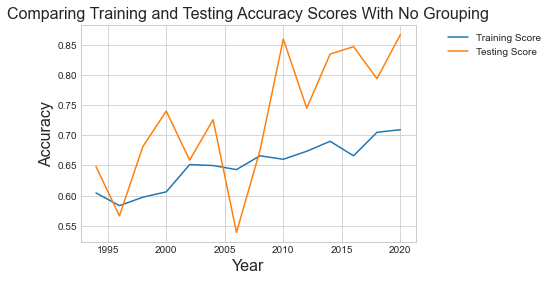

In [60]:
axs = plt.subplot()
sns.lineplot(x = years, y = training_total)
sns.lineplot(x = years, y = testing_total)
axs.legend(['Training Score', 'Testing Score'],loc='upper right', bbox_to_anchor=(1.4, 1))
axs.set_xlabel('Year', size = 16)
axs.set_ylabel('Accuracy', size=16)
axs.set_title('Comparing Training and Testing Accuracy Scores With No Grouping',size=16)

In [61]:
years_pres = list(range(1996,2022,4))
training_pres = []
testing_pres = []
for year in range(1996,2022,4):
    X_pres_tr = df_president[df_president['year'] < year].drop(columns=['winningParty'])
    X_pres_te = df_president[df_president['year'] == year].drop(columns=['winningParty'])
    Y_pres_tr = df_president[df_president['year'] < year][['winningParty']]
    Y_pres_te = df_president[df_president['year'] == year][['winningParty']]
    lr = LogisticRegression(tol=1e-4, max_iter=5000)
    lr.fit(X_pres_tr, Y_pres_tr.values.ravel())
    training_pres.append(metrics.accuracy_score(Y_pres_tr, lr.predict(X_pres_tr)))
    testing_pres.append(metrics.accuracy_score(Y_pres_te, lr.predict(X_pres_te)))

Text(0.5, 1.0, 'Presidential Elections')

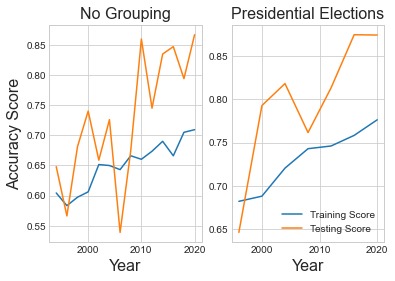

In [62]:
fig, axs = plt.subplots(1,2)
sns.lineplot(ax=axs[0],x = years, y = training_total)
sns.lineplot(ax=axs[0],x = years, y = testing_total)
axs[0].set_xlabel('Year', size = 16)
axs[0].set_ylabel('Accuracy Score', size=16)
axs[0].set_title('No Grouping',size=16)
sns.lineplot(ax=axs[1],x = years_pres, y = training_pres)
sns.lineplot(ax=axs[1],x = years_pres, y = testing_pres)
axs[1].legend(['Training Score', 'Testing Score'],loc='lower right')
axs[1].set_xlabel('Year', size = 16)
axs[1].set_title('Presidential Elections',size=16)

# MLP Logistic Regression

In [26]:
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier

In [42]:
years = list(range(1994,2022,2))
training_total = []
testing_total = []
for year in range(1994,2022,2):
    X_tr = df_log[df_log['year'] < year].drop(columns=['winningParty'])
    X_te = df_log[df_log['year'] == year].drop(columns=['winningParty'])
    Y_tr = df_log[df_log['year'] < year][['winningParty']]
    Y_te = df_log[df_log['year'] == year][['winningParty']]
    scaler = StandardScaler()  
    scaler.fit(X_tr)  
    X_tr = scaler.transform(X_tr)  
    X_te = scaler.transform(X_te) 
    clf = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(100,10), random_state=1, max_iter = 200, learning_rate_init = 0.01)
    clf.fit(X_tr, Y_tr.values.ravel())
    training_total.append(metrics.accuracy_score(Y_tr, clf.predict(X_tr)))
    testing_total.append(metrics.accuracy_score(Y_te, clf.predict(X_te)))

Text(0.5, 1.0, 'Comparing Training and Testing Accuracy Scores With No Grouping')

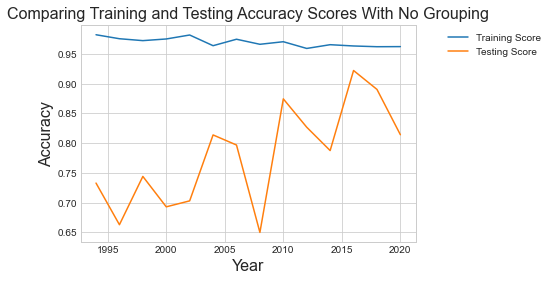

In [52]:
fig, axs = plt.subplots()
sns.lineplot(x = years, y = training_total)
sns.lineplot(x = years, y = testing_total)
axs.legend(['Training Score', 'Testing Score'],loc='upper right', bbox_to_anchor=(1.4, 1))
axs.set_xlabel('Year', size = 16)
axs.set_ylabel('Accuracy', size=16)
axs.set_title('Comparing Training and Testing Accuracy Scores With No Grouping',size=16)

In [40]:
years_pres = list(range(1996,2022,4))
training_pres = []
testing_pres = []
for year in range(1996,2022,4):
    X_pres_tr = df_president[df_president['year'] < year].drop(columns=['winningParty'])
    X_pres_te = df_president[df_president['year'] == year].drop(columns=['winningParty'])
    Y_pres_tr = df_president[df_president['year'] < year][['winningParty']]
    Y_pres_te = df_president[df_president['year'] == year][['winningParty']]
    scaler = StandardScaler()  
    scaler.fit(X_pres_tr)  
    X_pres_tr = scaler.transform(X_pres_tr)  
    X_pres_te = scaler.transform(X_pres_te) 
    clf = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(100,10), random_state=1, max_iter = 200, learning_rate_init = 0.01)
    clf.fit(X_pres_tr, Y_pres_tr.values.ravel())
    training_pres.append(metrics.accuracy_score(Y_pres_tr, clf.predict(X_pres_tr)))
    testing_pres.append(metrics.accuracy_score(Y_pres_te, clf.predict(X_pres_te)))

Text(0.5, 1.0, 'Presidential Elections')

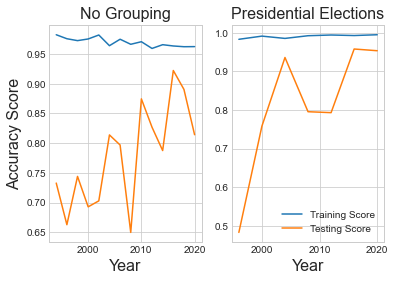

In [58]:
fig, axs = plt.subplots(1,2)
sns.lineplot(ax=axs[0],x = years, y = training_total)
sns.lineplot(ax=axs[0],x = years, y = testing_total)
axs[0].set_xlabel('Year', size = 16)
axs[0].set_ylabel('Accuracy Score', size=16)
axs[0].set_title('No Grouping',size=16)
sns.lineplot(ax=axs[1],x = years_pres, y = training_pres)
sns.lineplot(ax=axs[1],x = years_pres, y = testing_pres)
axs[1].legend(['Training Score', 'Testing Score'],loc='lower right')
axs[1].set_xlabel('Year', size = 16)
axs[1].set_title('Presidential Elections',size=16)